In [130]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import matplotlib.pyplot as plt

LOG.propagate = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [263]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2023-03-28 04:30:28,336 | INFO     |: Looking for Artemis Nano Peripheral Device: c0:83:b4:69:26:3c
2023-03-28 04:30:42,772 | ERROR    |: 
2023-03-28 04:30:43,774 | WARNING  |: Attempting to connect again...
2023-03-28 04:30:43,775 | INFO     |: Looking for Artemis Nano Peripheral Device: c0:83:b4:69:26:3c
2023-03-28 04:30:49,794 | INFO     |: Connected to c0:83:b4:69:26:3c


In [284]:
incoming_data = []
time = []
distance = []
speed = []
data = []
def pid(uiud, byte_arr):
    # variables
    global incoming_data
    global data
    global time
    global distance
    global speed
    
    # handle incoming data
    incoming_data = ble.bytearray_to_string(byte_arr)
    data.append(incoming_data)
    
    #indexes
    time_start = incoming_data.index('T')+2
    time_end = incoming_data.index('S')-1
    speed_start = time_end + 3
    speed_end = incoming_data.index('D')-1
    distance_start = speed_end + 3
    
    # create new arrays
    time.append(float(incoming_data[time_start:time_end]))
    speed.append(float(incoming_data[speed_start:speed_end]))
    distance.append(float(incoming_data[distance_start:]))
   

ble.start_notify(ble.uuid['RX_STRING'], pid)
ble.send_command(CMD.SET_PID, "0.07")

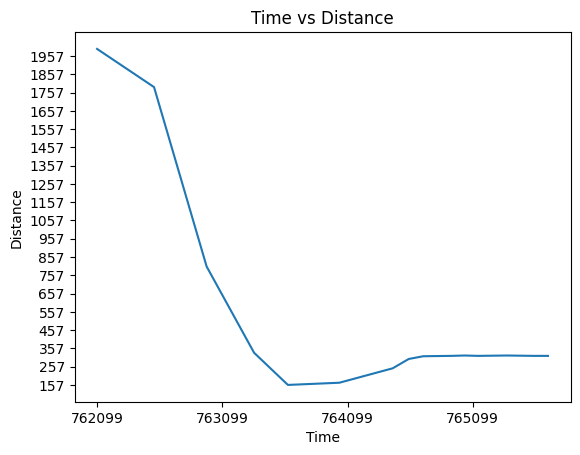

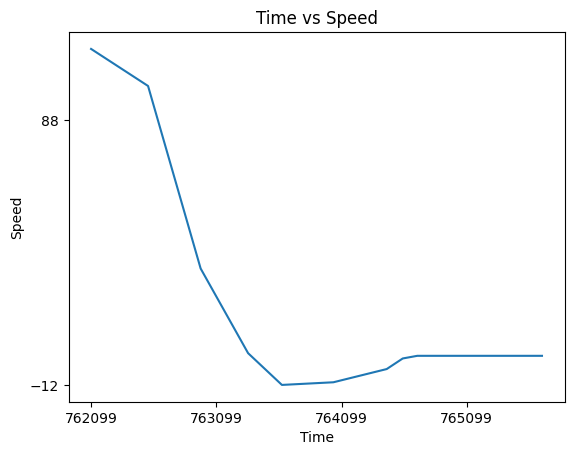

In [285]:
#Distance 
plt.plot (time [0:], distance [0:])
plt.xticks(np.arange(min(time), max(time), 1000))
plt.yticks(np.arange(min(distance), max(distance), 100))
plt.title ('Time vs Distance')
plt.xlabel ('Time')
plt.ylabel ('Distance')
plt.show()

# Speed
plt.plot (time [0:], speed [0:])
plt.xticks(np.arange(min(time), max(time), 1000))
plt.yticks(np.arange(min(speed), max(speed), 100))
plt.title ('Time vs Speed')
plt.xlabel ('Time')
plt.ylabel ('Speed')
plt.show()








In [267]:
ble.stop_notify(ble.uuid['RX_STRING'])